In [18]:
from pylab import *
import math

dimension1 = 50
dimension2 = 50
grid = zeros([dimension1,dimension2])
inertia = zeros([dimension1,dimension2])

Input value 1000
Input location 4
Input location 3


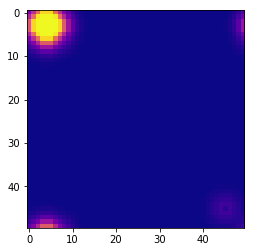

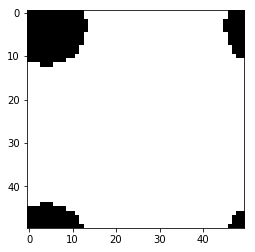

In [20]:
#grid[:,:] = 0
inertia[:,:] = 0

###
decay_factor = 0.7
lateral_decay_factor = decay_factor
###

stimulus = int(input("Input value "))
stim_x = int(input("Input location "))
stim_y = int(input("Input location "))

initial_stimulus = stimulus
#stimulus = 100
#stim_y = 25
#stim_x = 25

grid[stim_y][stim_x] += stimulus
for i, subgrid in enumerate(grid):
    for j, cell in enumerate(subgrid):
        if cell > 1000:
            grid[i][j] = 1000
        
#print(grid)

inertia[stim_y, stim_x] = 1
stimulus = grid[stim_y][stim_x]
offset = 1
iterator = 1
outer_counter = 1

while stimulus > 1:
    for x in range(-1,2,2):
        
        for y in range(-1,2,2):
            
            # Sets up a cross with a gradient
            try:
                grid[stim_y+(y*offset)][stim_x] += stimulus
                grid[stim_y][stim_x+(x*offset)] += stimulus

                inertia[stim_y+(y*offset)][stim_x] = 1
                inertia[stim_y][stim_x+(x*offset)] = 1
            except:
                print("Out of bounds in primary")
         
            
            lateral_stimulus = stimulus / 2
            lateral_offset = 1
            
            counter = 1
            
            for j in range(-1,2,1):
                while lateral_stimulus > 1:
                    
                    try:
                        ### X-wrapping
                        grid[stim_y+(y*offset)][stim_x+(lateral_offset)] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                    
                    try:
                        grid[stim_y+(y*offset)][stim_x+(lateral_offset)*-1] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                        
                        ### Y-wrapping
                    try:
                        grid[stim_y+(lateral_offset)][stim_x+(x*offset)] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                    
                    try:
                        grid[stim_y+(lateral_offset)*-1][stim_x+(x*offset)] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                        
                        ### Binarize x
                    try:
                        inertia[stim_y+(y*offset)][stim_x+lateral_offset] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                    
                    try:
                        inertia[stim_y+(y*offset)][stim_x+lateral_offset*-1] += lateral_stimulus
                    except:
                        print("Out of bounds in wrapper")
                        ### Binarize y
                    try:
                        inertia[stim_y+(lateral_offset)][stim_x+(x*offset)] += 1
                    except:
                        print("Out of bounds in wrapper")
                    
                    try:
                        inertia[stim_y+(lateral_offset)*-1][stim_x+(x*offset)] += 1
                    except:
                        print("Out of bounds in wrapper")
                        
                    steps = math.ceil(math.log(initial_stimulus, 2))
                    radian_steps = math.radians(90/steps)
                    cosine = math.cos(radian_steps*counter)
                    #print(cosine)
                    
                    lateral_stimulus *= cosine*lateral_decay_factor
                    lateral_offset += 1
                    counter += 1
           
            
    steps = math.ceil(math.log(initial_stimulus, 2))
    radian_steps = math.radians(90/steps)
    cosine = math.cos(radian_steps*outer_counter)    
    stimulus *= cosine*decay_factor
    offset += 1
    outer_counter += 1





    
plt.imshow(grid, cmap='plasma', interpolation='None', vmin = 0, vmax= 1000)
plt.show()
plt.imshow(inertia, cmap='binary', interpolation='None', vmin=0, vmax=1)
plt.show()

grid[:,:] = 0
inertia[:,:] = 0

###
decay_factor = 1.5
lateral_decay_factor = decay_factor
###

#stimulus = int(input("Input value"))
#stim_x = int(input("Input location"))
#stim_y = int(input("Input location"))

stimulus = 30
stim_y = 15
stim_x = 20


if stimulus > 30:
    stimulus = 30
print(stimulus)

grid[stim_y, stim_x] += stimulus
inertia[stim_y, stim_x] = 1
stimulus = stimulus / decay_factor
offset = 1
iterator = 1
while stimulus > 1:
    for x in range(-1,2,2):
        
        for y in range(-1,2,2):

            grid[stim_y+(y*offset)][stim_x] = stimulus
            inertia[stim_y+(y*offset)][stim_x] = stimulus
            
         
            
            lateral_stimulus = stimulus / 2
            lateral_offset = 1
            for j in range(-1,2,1):
                while lateral_stimulus > 1:
                    grid[stim_y+(y*offset)][stim_x+(lateral_offset)] = lateral_stimulus
                    grid[stim_y+(y*offset)][stim_x+(lateral_offset)*-1] = lateral_stimulus
                    inertia[stim_y+(y*offset)][stim_x+lateral_offset] = lateral_stimulus
                    inertia[stim_y+(y*offset)][stim_x+lateral_offset*-1] = lateral_stimulus
                    lateral_stimulus /= lateral_decay_factor
                    lateral_offset += 1

            
        
    stimulus /= decay_factor
    offset += 1





    
plt.imshow(grid, cmap='plasma', interpolation='None', vmin = 0, vmax= 30)
plt.show()
plt.imshow(inertia, cmap='binary', interpolation='None', vmin=0, vmax=1)
plt.show()




In [30]:
print(grid)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
